In [ ]:
! pip install GetOldTweets3

In [15]:
! GetOldTweets3 --querysearch "Novo Nordisk Insulin" --lang en --since 2020-01-01 --until 2020-02-28

Saved 327
Done. Output file generated "output_got.csv".


In [16]:
import pandas as pd

In [17]:
df = pd.read_csv("output_got.csv", error_bad_lines=False)
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [18]:
df.head()

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,2020-02-27 18:55:58,sunshinetinks,NaN,0,0,0,Novo Nordisk to offer free insulin to U.S. patients in immediate need - Reuters,NaN,NaN,NaN,1233103497899499520,https://twitter.com/sunshinetinks/status/1233103497899499520
1,2020-02-27 16:53:45,CBCUS,NaN,0,0,0,"For those not aware, it is already available. Do not ration! Store insulin as directed for it to maintain efficacy! Novo Nordisk to offer free insulin to U.S. patients in immediate need - Reuters #NovoNordisk #freeinsulin #diabetes https://apple.news/AX_z6X1xkT6SGdvji8PJfpw",NaN,NaN,#NovoNordisk #freeinsulin #diabetes,1233072741298982912,https://twitter.com/CBCUS/status/1233072741298982912
2,2020-02-27 14:44:13,clegoues,clegoues,0,0,6,"This rant brought to you by the US retail price of insulin (whose discoverers sold the patent to the UToronto for $1 for the public good!), driven up near $500/vial purely for profit by the unregulated triopoly (is that a word?) of Eli Lily, Novo Nordisk, and Sanofi.",NaN,NaN,NaN,1233040141972836354,https://twitter.com/clegoues/status/1233040141972836354
3,2020-02-26 23:49:26,SouthernDiva12,klarstrup,1,0,0,Where is Novo Nordisk building worlds largest insulin plant? - North Carolina - 4 billion dollar plant,NaN,NaN,NaN,1232814962051076106,https://twitter.com/SouthernDiva12/status/1232814962051076106
4,2020-02-26 22:33:00,HannahNewsIN,NaN,0,1,1,"The goal is to break up the dominance of Eli Lilly, Novo Nordisk, and Sanofi in the insulin market",NaN,NaN,NaN,1232795727090286592,https://twitter.com/HannahNewsIN/status/1232795727090286592


In [39]:
filt = df.retweets > 0
df1 = df[filt]
df1

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
4,2020-02-26 22:33:00,HannahNewsIN,NaN,0,1,1,"The goal is to break up the dominance of Eli Lilly, Novo Nordisk, and Sanofi in the insulin market",NaN,NaN,NaN,1232795727090286592,https://twitter.com/HannahNewsIN/status/1232795727090286592
5,2020-02-26 02:24:57,KeelingCurve_9,Michelej60,0,2,1,"Thank God for Novo Nordisk, Eli Lilly and Sanofi jacking insulin prices so high that diabetics DIE, and for Mylan hiking up the price of Epipens, and for Purdue Pharma KILLING hundreds of thousands of Americans with opioids. Those private corporations are doing a GREAT job.",NaN,NaN,NaN,1232491713253593088,https://twitter.com/KeelingCurve_9/status/1232491713253593088
13,2020-02-21 20:50:11,lollydaggle,NaN,4,47,96,"In Delaware, Democratic Senator @ChrisCoons is accepting money from Novo Nordisk, an insulin manufacturer who is literally price gouging people to death. Do you want to elect a real progressive to office instead? Vote @JessforDelaware who supports #Medicare4All.",NaN,@ChrisCoons @JessforDelaware,#Medicare4All,1230957915516932101,https://twitter.com/lollydaggle/status/1230957915516932101
15,2020-02-21 04:59:02,BLaw,NaN,0,2,4,"Sanofi-Aventis, Novo Nordisk, and Eli Lilly will have to face racketeering claims over their alleged scheme to overcharge for insulin while paying kickbacks for insurance coverage.",NaN,NaN,NaN,1230718551452876801,https://twitter.com/BLaw/status/1230718551452876801
17,2020-02-20 17:47:46,Mike_S_Leonard,NaN,2,2,2,"Sanofi-Aventis, Novo Nordisk, and Eli Lilly must face racketeering claims over an alleged scheme to overcharge for insulin while paying kickbacks for insurance coverage of their interchangeable drugs, a federal judge ruled in two parallel cases today. https://news.bloomberglaw.com/mergers-and-antitrust/sanofi-novo-nordisk-eli-lilly-must-face-insulin-rico-claims",NaN,NaN,NaN,1230549620977283073,https://twitter.com/Mike_S_Leonard/status/1230549620977283073
...,...,...,...,...,...,...,...,...,...,...,...,...
300,2020-01-02 19:16:59,1stKiersten,NaN,0,3,2,Novo Nordisk to offer free insulin to U.S. patients in immediate need | Article [AMP] | Reuters,NaN,NaN,NaN,1212815064773865472,https://twitter.com/1stKiersten/status/1212815064773865472
302,2020-01-02 19:16:01,Reuters,NaN,3,50,86,Novo Nordisk to offer free insulin to U.S. patients in immediate need https://reut.rs/36jQJKc,NaN,NaN,NaN,1212814821990785025,https://twitter.com/Reuters/status/1212814821990785025
312,2020-01-02 16:49:00,Lija27,NaN,5,5,10,"We've been hearing about new insulin company programs starting Jan 1st. Here's Novo Nordisk's offerings. I was surprised to see an ""Immediate Supply"" option is included for people ""at risk of rationing"" with attestation of ""financial need."" Interesting.",NaN,NaN,NaN,1212777823976509443,https://twitter.com/Lija27/status/1212777823976509443
313,2020-01-02 16:12:10,_jacquie_lee,NaN,0,5,3,"Reminder that Novo Nordisk's discounted insulin program program starts now (h/t to @MedResJourno for pointing this out) They 1st announced this in Sept. -""authorized generic"" versions available now -Uninsured&amp;people w commercial insurance can buy a month’s supply for $99",NaN,@MedResJourno,NaN,1212768555743232003,https://twitter.com/_jacquie_lee/status/1212768555743232003


In [40]:
df2 = df1[["date", "username", "text", "retweets"]]
df2["date"] = pd.to_datetime(df2["date"])
df2["date"] = df2["date"].dt.floor('d')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
df2

,date,username,text,retweets
4,2020-02-26,HannahNewsIN,"The goal is to break up the dominance of Eli Lilly, Novo Nordisk, and Sanofi in the insulin market",1
5,2020-02-26,KeelingCurve_9,"Thank God for Novo Nordisk, Eli Lilly and Sanofi jacking insulin prices so high that diabetics DIE, and for Mylan hiking up the price of Epipens, and for Purdue Pharma KILLING hundreds of thousands of Americans with opioids. Those private corporations are doing a GREAT job.",2
13,2020-02-21,lollydaggle,"In Delaware, Democratic Senator @ChrisCoons is accepting money from Novo Nordisk, an insulin manufacturer who is literally price gouging people to death. Do you want to elect a real progressive to office instead? Vote @JessforDelaware who supports #Medicare4All.",47
15,2020-02-21,BLaw,"Sanofi-Aventis, Novo Nordisk, and Eli Lilly will have to face racketeering claims over their alleged scheme to overcharge for insulin while paying kickbacks for insurance coverage.",2
17,2020-02-20,Mike_S_Leonard,"Sanofi-Aventis, Novo Nordisk, and Eli Lilly must face racketeering claims over an alleged scheme to overcharge for insulin while paying kickbacks for insurance coverage of their interchangeable drugs, a federal judge ruled in two parallel cases today. https://news.bloomberglaw.com/mergers-and-antitrust/sanofi-novo-nordisk-eli-lilly-must-face-insulin-rico-claims",2
...,...,...,...,...
300,2020-01-02,1stKiersten,Novo Nordisk to offer free insulin to U.S. patients in immediate need | Article [AMP] | Reuters,3
302,2020-01-02,Reuters,Novo Nordisk to offer free insulin to U.S. patients in immediate need https://reut.rs/36jQJKc,50
312,2020-01-02,Lija27,"We've been hearing about new insulin company programs starting Jan 1st. Here's Novo Nordisk's offerings. I was surprised to see an ""Immediate Supply"" option is included for people ""at risk of rationing"" with attestation of ""financial need."" Interesting.",5
313,2020-01-02,_jacquie_lee,"Reminder that Novo Nordisk's discounted insulin program program starts now (h/t to @MedResJourno for pointing this out) They 1st announced this in Sept. -""authorized generic"" versions available now -Uninsured&amp;people w commercial insurance can buy a month’s supply for $99",5


In [42]:
from textblob import TextBlob

In [43]:
# import re

polarity = []
for text in list(df2.text):
  cleaned = ' '.join(text)
  analysis = TextBlob(cleaned).sentiment.polarity
  polarity.append(analysis)

df2["polarity"] = polarity
df2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,date,username,text,retweets,polarity
4,2020-02-26,HannahNewsIN,"The goal is to break up the dominance of Eli Lilly, Novo Nordisk, and Sanofi in the insulin market",1,0.00
5,2020-02-26,KeelingCurve_9,"Thank God for Novo Nordisk, Eli Lilly and Sanofi jacking insulin prices so high that diabetics DIE, and for Mylan hiking up the price of Epipens, and for Purdue Pharma KILLING hundreds of thousands of Americans with opioids. Those private corporations are doing a GREAT job.",2,0.00
13,2020-02-21,lollydaggle,"In Delaware, Democratic Senator @ChrisCoons is accepting money from Novo Nordisk, an insulin manufacturer who is literally price gouging people to death. Do you want to elect a real progressive to office instead? Vote @JessforDelaware who supports #Medicare4All.",47,0.00
15,2020-02-21,BLaw,"Sanofi-Aventis, Novo Nordisk, and Eli Lilly will have to face racketeering claims over their alleged scheme to overcharge for insulin while paying kickbacks for insurance coverage.",2,0.00
17,2020-02-20,Mike_S_Leonard,"Sanofi-Aventis, Novo Nordisk, and Eli Lilly must face racketeering claims over an alleged scheme to overcharge for insulin while paying kickbacks for insurance coverage of their interchangeable drugs, a federal judge ruled in two parallel cases today. https://news.bloomberglaw.com/mergers-and-antitrust/sanofi-novo-nordisk-eli-lilly-must-face-insulin-rico-claims",2,-0.25
...,...,...,...,...,...
300,2020-01-02,1stKiersten,Novo Nordisk to offer free insulin to U.S. patients in immediate need | Article [AMP] | Reuters,3,0.00
302,2020-01-02,Reuters,Novo Nordisk to offer free insulin to U.S. patients in immediate need https://reut.rs/36jQJKc,50,-0.25
312,2020-01-02,Lija27,"We've been hearing about new insulin company programs starting Jan 1st. Here's Novo Nordisk's offerings. I was surprised to see an ""Immediate Supply"" option is included for people ""at risk of rationing"" with attestation of ""financial need."" Interesting.",5,0.00
313,2020-01-02,_jacquie_lee,"Reminder that Novo Nordisk's discounted insulin program program starts now (h/t to @MedResJourno for pointing this out) They 1st announced this in Sept. -""authorized generic"" versions available now -Uninsured&amp;people w commercial insurance can buy a month’s supply for $99",5,0.00


In [44]:
filt = df2.polarity > 0
df3 = df2[filt]
df3

,date,username,text,retweets,polarity
224,2020-01-08,ferguriffic,Our insurance company will now only cover Admelog insulin when they've covered Novolog for my daughter since 2010: but Novo Nordisk is offering a $99/month program for 3 vials So I can assume that Novo is making a big profit on $99 by making us pay cash. #insulin4all,2,0.75


In [45]:
# TODO: split polarity into 3 categories: positive, negative and neutral

In [48]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

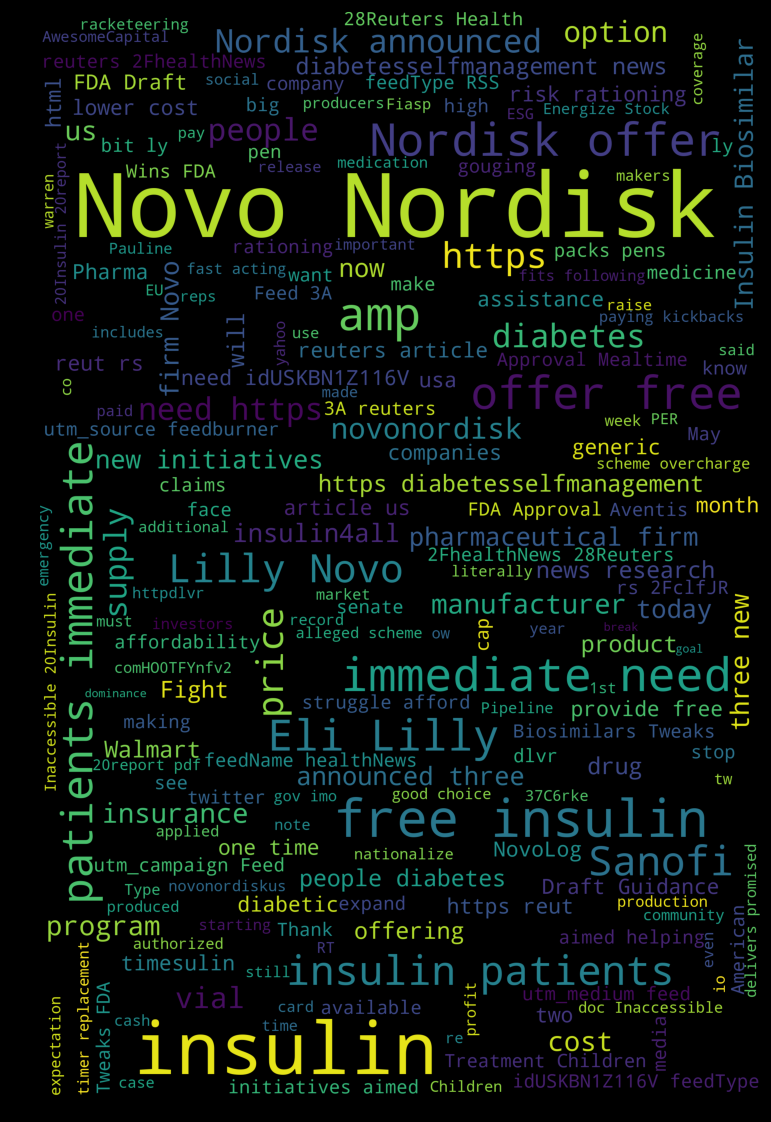

In [61]:
text = ' '.join(df2.text)  # .replace('Novo', '')  # df3.text  # Rivals: Eli Lilly and Sanofi. # Insulin4all

wordcloud = WordCloud(
    width=2000,
    height=3000,
    background_color='black',
    stopwords=STOPWORDS
).generate(str(text))

fig = plt.figure(
    figsize=(30, 20),
    facecolor='k',
    edgecolor='k',
)

plt.imshow(wordcloud)


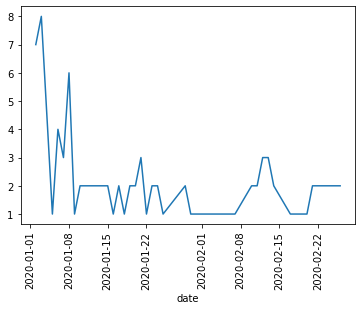

In [66]:
a = df2.groupby(df2['date'].dt.date).size()  # .rename(columns={'size': 'sum'})
a.plot(rot=90)  # reset_index()


In [ ]:
# TODO: floor month, instead of day

# df2.value_counts()


In [71]:
! pip install beautifulsoup4

In [77]:
# Get top Novo products
import requests
from bs4 import BeautifulSoup

URL = r"https://www.novonordisk.com/products.html"
r = requests.get(URL)
soup = BeautifulSoup(r.content, 'html.parser')
soup.prettify()

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n <head>\n  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>\n  <title>\n   403 - Forbidden: Access is denied.\n  </title>\n  <style type="text/css">\n   <!--\r\nbody{margin:0;font-size:.7em;font-family:Verdana, Arial, Helvetica, sans-serif;background:#EEEEEE;}\r\nfieldset{padding:0 15px 10px 15px;} \r\nh1{font-size:2.4em;margin:0;color:#FFF;}\r\nh2{font-size:1.7em;margin:0;color:#CC0000;} \r\nh3{font-size:1.2em;margin:10px 0 0 0;color:#000000;} \r\n#header{width:96%;margin:0 0 0 0;padding:6px 2% 6px 2%;font-family:"trebuchet MS", Verdana, sans-serif;color:#FFF;\r\nbackground-color:#555555;}\r\n#content{margin:0 0 0 2%;position:relative;}\r\n.content-container{background:#FFF;width:96%;margin-top:8px;padding:10px;position:relative;}\r\n-->\n  </style>\n </head>\n <body>\n  <div id="header">\n   <h1>\n    Server E